# Compare Prompts

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Set folder path
folder_path = "/home/fantoni/patent-sentence-classification/results/prompting"

# Choose model
model_name = 'gpt-3.5-turbo'
model_name = 'gpt-4o'

# Set averaging mode
average = 'micro'

results_all = {}
for file_name in os.listdir(folder_path):
    if file_name.endswith(".xlsx") and file_name.startswith(model_name):
        prompt_number = file_name.split('_')[1].replace(".xlsx", "")[-1]
        result_df = pd.read_excel(os.path.join(folder_path, file_name))

        # Set labels
        true_labels = result_df['true_class']  
        predicted_labels = result_df['pred_class']

        # Calculate classification metrics
        precision = precision_score(true_labels, predicted_labels, average=average, zero_division=0)
        recall = recall_score(true_labels, predicted_labels, average=average, zero_division=0)
        f1 = f1_score(true_labels, predicted_labels, average=average, zero_division=0)

        # Append to results
        results_all[prompt_number] = {'precision': precision, 'recall': recall, 'f1': f1}

results_df = pd.DataFrame.from_dict(results_all, orient='index').sort_index().round(3)
results_df

,precision,recall,f1
1,0.585,0.585,0.585
3,0.643,0.643,0.643
5,0.617,0.617,0.617
8,0.523,0.523,0.523


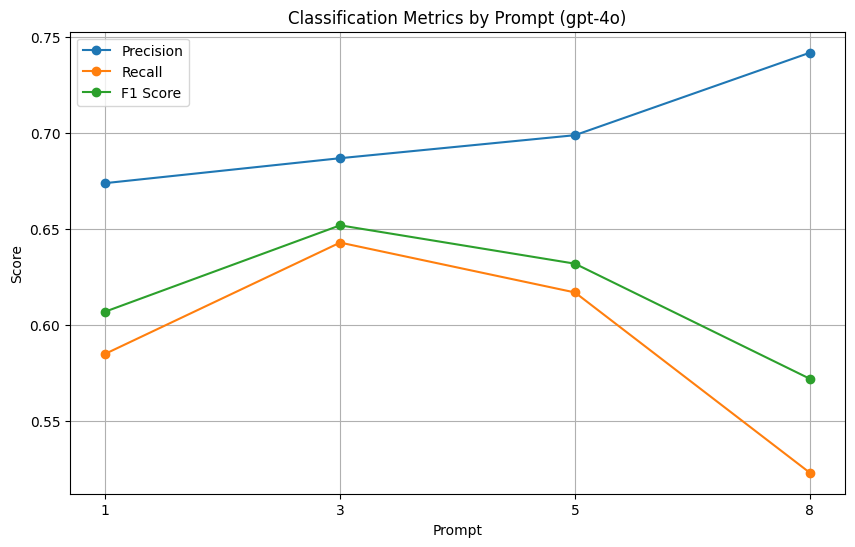

In [13]:
# Sort results by prompt number
sorted_prompts = results_df.index.tolist()
precision_values = results_df['precision'].tolist()
recall_values = results_df['recall'].tolist()
f1_values = results_df['f1'].tolist()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sorted_prompts, precision_values, marker = 'o', label='Precision')
plt.plot(sorted_prompts, recall_values, marker = 'o', label='Recall')
plt.plot(sorted_prompts, f1_values, marker = 'o', label='F1 Score')

plt.xlabel('Prompt')
plt.ylabel('Score')
plt.title(f'Classification Metrics by Prompt ({model_name})')
plt.legend()
plt.grid(True)
plt.show()